In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle
import mne
import gc

from mne.channels import make_1020_channel_selections
from mne.event import define_target_events
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


# from sklearn.model_selection import KFold, train_test_split, cross_validate
# from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# import warnings


from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

class_names = ['1','2','3']
import matplotlib
#matplotlib.use('Agg')

In [2]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import random
# import seaborn as sns
# import pickle
# import mne
# import gc
# import concurrent.futures
# import multiprocessing

# from mne.channels import make_1020_channel_selections
# from mne.event import define_target_events
# from sklearn.preprocessing import StandardScaler
# from tqdm import tqdm


# from sklearn.model_selection import KFold, train_test_split, cross_validate
# from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
# from sklearn.preprocessing import label_binarize
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# import warnings
# warnings.filterwarnings("ignore")


# from sklearn.linear_model import LogisticRegression
# from sklearn.dummy import DummyClassifier
# import matplotlib
# matplotlib.use('Agg')

# class_names = ['1','2','3']

# bars = [None] * 56

# os.chdir('/home/castrogaray-j/U_Winnipeg_OneDrive/Pattern recognition/BICT/Events_raw')

# files = os.listdir()
# pkl_files = sorted([file for file in files if file.startswith('raw') and file.endswith('.pkl')])
# subjects = set([file[4:6] for file in pkl_files])

# with open(pkl_files[0], 'rb') as file:
#     events = pickle.load(file)

# #%%capture --no-stderr --no-stdout
# wind_length = 4
# b_freq, u_freq = 1.0, 50.0
# sfreq = events[0].info['sfreq']
# freqs = np.arange(b_freq, u_freq, 1)  # Frequency range
# n_cycles = freqs / 2.  # Number of cycles per frequency

# ch_names = events[0].info['ch_names']

# #total_iter= len(pkl_files)
# #progress_bar = tqdm(total=total_iter, desc="Progress", unit="iter")

# def plot_spectrogram(power, file_path):
#     import matplotlib.pyplot as plt
#     # Extraer datos
#     times_plt = power.times
#     freqs_plt = power.freqs
#     data_plt = power.data[ 0, :, :]  # Seleccionar el canal correspondiente
    
#     # Aplicar baseline desde el inicio hasta t=0
#     baseline_idx = np.where(times_plt <= 0)[0]  # Índices donde el tiempo es <= 0
#     baseline_mean = np.mean(data_plt[:, baseline_idx], axis=1, keepdims=True)  # Promedio en baseline
    
#     # Aplicar corrección de baseline según 'logratio'
#     data_plt = np.log10(data_plt / baseline_mean)
    
#     # Configuración de límites de color
#     vmin, vmax = np.percentile(data_plt, [5, 95])  # MNE ajusta entre percentiles 5 y 95 por defecto
    
    
#     # Crear la figura
#     fig, axes = plt.subplots(figsize=(10, 5))
#     pcm = plt.pcolormesh(times_plt, freqs_plt, data_plt, shading='auto', cmap='RdBu_r', vmin=vmin, vmax=vmax)
    
#     for ax in fig.axes:
#                 ax.set_xticks([])  # Quitar ticks en eje X
#                 ax.set_yticks([])  # Quitar ticks en eje Y
#                 ax.set_xlabel("")  # Quitar etiqueta del eje X
#                 ax.set_ylabel("")  # Quitar etiqueta del eje Y
#                 ax.set_frame_on(False)  # Quitar borde del gráfico

#     plt.savefig(file_path, dpi=100, bbox_inches='tight')
    
#     # Cerrar la figura para liberar memoria
#     plt.close(fig)
#     #del fig, axes, plt, pcm
#     #gc.collect()

# with open('event_labels/performance_labels', 'rb') as file:
#      labels_array = pickle.load(file)
    
# def procesar_archivo(idx):
#     """
#     Función que procesa un archivo en paralelo
#     """
#     pkl = pkl_files[idx]  # Selecciona el archivo correspondiente
#     labels_df = labels_array[idx]  # Obtiene los labels correspondientes
    
#     with open(pkl, 'rb') as file:
#         events = pickle.load(file)

#     filtered_events = [item for i, item in enumerate(events[1:]) if i in labels_df.index]
#     total_iter= len(filtered_events)
#     bars[idx] = tqdm(total=total_iter, desc="Progress", unit="iter")
#     #print("\n")
#     #print(int(pkl[8:10]), int(pkl[-5]))
#     for event_idx, event in enumerate(filtered_events[:3]):
#         #print( event_idx, int(pkl[8:10]), int(pkl[-5]))
#         event.crop(tmin=1)
#         label = labels_df['label'].values[event_idx]
        
#         ch_names = events[0].info['ch_names']  # Obtener nombres de canales
#         for ch in ch_names:
#             power = event.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks=ch)
#             path = "/data/castrogaray-j/Spectrogram_images/subject_{}_class_{}_label_{}_event_{}_channel_{}.png".format(int(pkl[8:10]), int(pkl[-5]), label, idx, ch)
#             plot_spectrogram(power, path)
#         #del power
#         #gc.collect()

#         bars[idx].update(1)

#     # Cerrar la barra de progreso al finalizar
#     bars[idx].close()


# if __name__ == "__main__":
#     num_procesos = min(56, len(pkl_files[:2]))
#     print(num_procesos)

#     parametros = list(range(num_procesos))  # Lista de parámetros del 0 al 55
    
    
    
#     # Crear un pool de procesos
#     # with multiprocessing.Pool(processes=num_procesos) as pool:
#     #     pool.map(procesar_archivo, range(num_procesos))
#     with multiprocessing.Pool(processes=num_procesos) as pool:
#         pool.map(procesar_archivo, range(len(pkl_files[:2])))  # Enviar solo índices válidos

In [3]:
os.chdir('/home/castrogaray-j/U_Winnipeg_OneDrive/Pattern recognition/BICT/Events_raw')
os.getcwd()

'/home/castrogaray-j/U_Winnipeg_OneDrive/Pattern recognition/BICT/Events_raw'

In [4]:

files = os.listdir()
pkl_files = sorted([file for file in files if file.startswith('raw') and file.endswith('.pkl')])
subjects = set([file[4:6] for file in pkl_files])
pkl_files
#len(pkl_files)
#int(pkl_files[9][8:10])

['raw_sub-01_class_1.pkl',
 'raw_sub-01_class_2.pkl',
 'raw_sub-01_class_3.pkl',
 'raw_sub-02_class_1.pkl',
 'raw_sub-02_class_2.pkl',
 'raw_sub-02_class_3.pkl',
 'raw_sub-03_class_1.pkl',
 'raw_sub-03_class_2.pkl',
 'raw_sub-03_class_3.pkl',
 'raw_sub-04_class_1.pkl',
 'raw_sub-04_class_2.pkl',
 'raw_sub-04_class_3.pkl',
 'raw_sub-05_class_1.pkl',
 'raw_sub-05_class_2.pkl',
 'raw_sub-05_class_3.pkl',
 'raw_sub-06_class_1.pkl',
 'raw_sub-06_class_2.pkl',
 'raw_sub-06_class_3.pkl',
 'raw_sub-07_class_1.pkl',
 'raw_sub-07_class_2.pkl',
 'raw_sub-07_class_3.pkl',
 'raw_sub-09_class_1.pkl',
 'raw_sub-09_class_2.pkl',
 'raw_sub-09_class_3.pkl',
 'raw_sub-11_class_1.pkl',
 'raw_sub-11_class_2.pkl',
 'raw_sub-11_class_3.pkl',
 'raw_sub-12_class_1.pkl',
 'raw_sub-12_class_2.pkl',
 'raw_sub-12_class_3.pkl',
 'raw_sub-13_class_1.pkl',
 'raw_sub-13_class_2.pkl',
 'raw_sub-13_class_3.pkl',
 'raw_sub-14_class_1.pkl',
 'raw_sub-14_class_2.pkl',
 'raw_sub-14_class_3.pkl',
 'raw_sub-15_class_2.pkl',
 

In [5]:
with open(pkl_files[2], 'rb') as file:
     events = pickle.load(file)
events[0]

<RawArray | 64 x 640 (5.0 s), ~387 kB, data loaded>

In [6]:
#%%capture --no-stderr --no-stdout
#%%capture --no-stderr --no-stdout cap
# import numpy as np 
# wind_length = 4
# b_freq, u_freq = 1.0, 50.0

# freqs = np.arange(b_freq, u_freq, 1)  # Frequency range
# n_cycles = freqs / 2.  # Number of cycles per frequency

# with open(pkl_files[2], 'rb') as file:
#     events = pickle.load(file)
    
# #ch = 
# power = events[2].crop(tmin=0).compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks='Fp1')
# power.plot(baseline=(None, 0), mode='logratio',colorbar=True)
# Quitar ejes
# for ax in fig[0].axes:
#     ax.set_xticks([])  # Quitar ticks en eje X
#     ax.set_yticks([])  # Quitar ticks en eje Y
#     ax.set_xlabel("")  # Quitar etiqueta del eje X
#     ax.set_ylabel("")  # Quitar etiqueta del eje Y
#     ax.set_frame_on(False)  # Quitar borde del gráfico
#fig[0].show()
#fig[0].savefig("/home/castrogaray-j/Spectrogram_images/spectrogram_no_axes.png", dpi=100)

In [7]:
#power.data[ 0, :, :].shape

In [22]:

def plot_spectrogram(power, file_path):
    import matplotlib.pyplot as plt
    # Extraer datos
    times_plt = power.times
    freqs_plt = power.freqs
    data_plt = power.data[ 0, :, :]  # Seleccionar el canal correspondiente
    
    # Aplicar baseline desde el inicio hasta t=0
    baseline_idx = np.where(times_plt <= 0)[0]  # Índices donde el tiempo es <= 0
    baseline_mean = np.mean(data_plt[:, baseline_idx], axis=1, keepdims=True)  # Promedio en baseline
    
    # Aplicar corrección de baseline según 'logratio'
    data_plt = np.log10(data_plt / baseline_mean)
    
    # Configuración de límites de color
    vmin, vmax = np.percentile(data_plt, [5, 95])  # MNE ajusta entre percentiles 5 y 95 por defecto
    
    
    # Crear la figura
    fig, axes = plt.subplots(figsize=(10, 5))
    print(times_plt.shape, freqs_plt.shape, data_plt.shape)
    pcm = plt.pcolormesh(times_plt, freqs_plt, data_plt, shading='auto', cmap='RdBu_r', vmin=vmin, vmax=vmax)
    # axes.set_xlabel('Time (s)')
    # axes.set_ylabel('Frequency (Hz)')
    # fig.colorbar(pcm, ax=axes, label='PSD')
    
    for ax in fig.axes:
                ax.set_xticks([])  # Quitar ticks en eje X
                ax.set_yticks([])  # Quitar ticks en eje Y
                ax.set_xlabel("")  # Quitar etiqueta del eje X
                ax.set_ylabel("")  # Quitar etiqueta del eje Y
                ax.set_frame_on(False)  # Quitar borde del gráfico

    plt.savefig(file_path, dpi=100, bbox_inches='tight')
    plt.show()
    
    # Cerrar la figura para liberar memoria
    plt.close(fig)
    del fig, axes, plt, pcm
    gc.collect()


def ICA_components(raw_cleaned):
    ica_cleaned = mne.preprocessing.ICA(
        n_components=10, method="picard", max_iter="auto", random_state=97, verbose='error'
    )
    
    ica_cleaned.fit(raw_cleaned, verbose='error')

    components = ica_cleaned.get_sources(raw_cleaned)
    return components

def plot_erds(power, file_path):
        import matplotlib.pyplot as plt

        # Extract data
        times = power.times
        freqs = power.freqs
        #data = power.data[0, 0, :, :]  # Select the corresponding channel
        data = power.data[ 0, :, :]  # Select the corresponding channel

        # Apply baseline correction
        baseline = (0,1)
        power.apply_baseline(baseline=baseline, mode='percent')#, verbose='error')

        # Plot ERDS map
        fig, ax = plt.subplots(figsize=(10, 5))
        cax = ax.imshow(data, aspect='auto', origin='lower', 
                        extent=[times[0], times[-1], freqs[0], freqs[-1]], 
                        cmap='RdBu_r', vmin=-1, vmax=1)
        # ax.set_title(title)
        # ax.set_xlabel('Time (s)')
        # ax.set_ylabel('Frequency (Hz)')
        # fig.colorbar(cax, ax=ax, label='ERDS (dB)')
        
        for ax in fig.axes:
                ax.set_xticks([])  # Quitar ticks en eje X
                ax.set_yticks([])  # Quitar ticks en eje Y
                ax.set_xlabel("")  # Quitar etiqueta del eje X
                ax.set_ylabel("")  # Quitar etiqueta del eje Y
                ax.set_frame_on(False)  # Quitar borde del gráfico
            
        plt.savefig(file_path, dpi=100, bbox_inches='tight', pad_inches=0.0)
        plt.show()

        

    # Example usage
    #plot_erds(power, title='ERDS Map for Channel O2') 



In [23]:
pkl_files[0][8:10], pkl_files[0][-5]

('01', '1')

In [24]:
from mne.time_frequency import tfr_multitaper

wind_length = 4
b_freq, u_freq = 1.0, 50.0

freqs = np.arange(b_freq, u_freq, 1)  # Frequency range
n_cycles = freqs / 2.  # Number of cycles per frequency
with open(pkl_files[0], 'rb') as file:
    events = pickle.load(file)

events[0].info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 128.0 Hz
>

In [25]:
# def plot_spectrogram(power, file_path):
#     import matplotlib.pyplot as plt
#     # Extraer datos
#     times_plt = power.times
#     freqs_plt = power.freqs
#     data_plt = power.data[ 0, :, :]  # Seleccionar el canal correspondiente
    
#     # Aplicar baseline desde el inicio hasta t=0
#     baseline_idx = np.where(times_plt <= 0)[0]  # Índices donde el tiempo es <= 0
#     baseline_mean = np.mean(data_plt[:, baseline_idx], axis=1, keepdims=True)  # Promedio en baseline
    
#     # Aplicar corrección de baseline según 'logratio'
#     data_plt = np.log10(data_plt / baseline_mean)
    
#     # Configuración de límites de color
#     vmin, vmax = np.percentile(data_plt, [5, 95])  # MNE ajusta entre percentiles 5 y 95 por defecto
    
    
#     # Crear la figura
#     fig, axes = plt.subplots(figsize=(10, 5))
#     pcm = plt.pcolormesh(times_plt, freqs_plt, data_plt, shading='auto', cmap='RdBu_r', vmin=vmin, vmax=vmax)
    
#     for ax in fig.axes:
#                 ax.set_xticks([])  # Quitar ticks en eje X
#                 ax.set_yticks([])  # Quitar ticks en eje Y
#                 ax.set_xlabel("")  # Quitar etiqueta del eje X
#                 ax.set_ylabel("")  # Quitar etiqueta del eje Y
#                 ax.set_frame_on(False)  # Quitar borde del gráfico

#     plt.savefig(file_path, dpi=100, bbox_inches='tight')
    
#     # Cerrar la figura para liberar memoria
#     plt.show()
#     plt.close(fig)
#     #del fig, axes, plt, pcm
#     #gc.collect()

(640,) (49,) (49, 640)


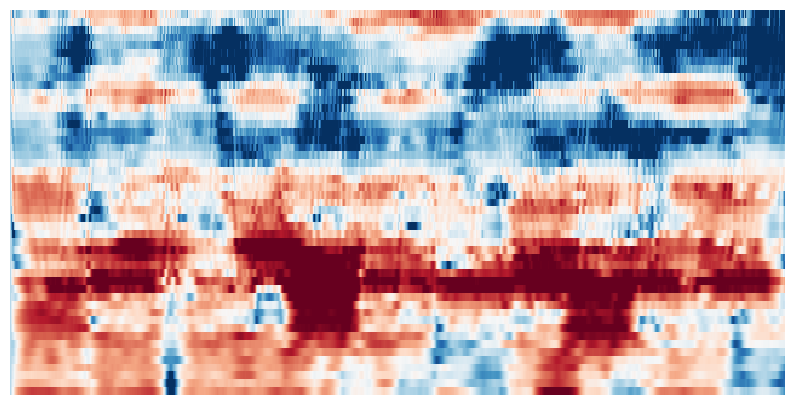

In [27]:
with open(pkl_files[0], 'rb') as file:
    events = pickle.load(file)
#for event in events:
power = events[1].compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks='O2')
#power = event.crop(tmin=1).compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks='O2')

path = "/home/castrogaray-j/Spectrogram_images/subject_ERDS.png".format(1, 2, 3, 4)
#plot_erds(power, path)
path = "/home/castrogaray-j/Spectrogram_images/subject_spectrogram.png".format(1, 2, 3, 4)
plot_spectrogram(power, path)

In [9]:
from mne import concatenate_raws

# Concatenar todos los eventos en un único objeto Raw
concatenated_events = concatenate_raws(events)


concatenated_events.get_data().shape[1]/128
components = ICA_components(concatenated_events)
epochs = mne.make_fixed_length_epochs(components, duration=5, preload=True, verbose='error')
epochs.get_data().shape

(1, 10, 640)

In [10]:
with open(pkl_files[0], 'rb') as file:
    events = pickle.load(file)
raw = mne.concatenate_raws(events)
epochs = mne.make_fixed_length_epochs(raw, duration=5, preload=True, verbose='error')
epochs.get_data().shape
components = ICA_components(epochs)
components

<Epochs | 179 events (all good), 0 – 4.992 s (baseline off), ~8.8 MB, data loaded,
 '1': 179>

Applying baseline correction (mode: percent)
Applying baseline correction (mode: percent)


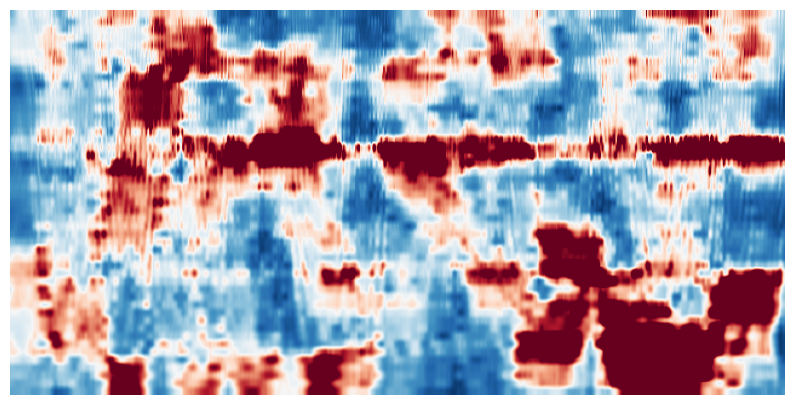

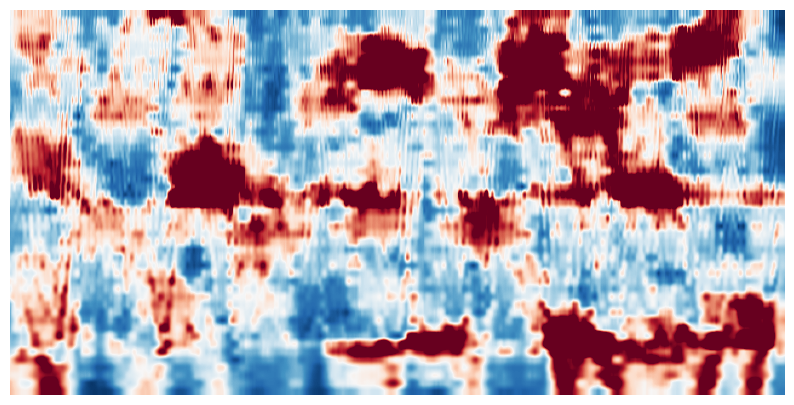

In [15]:
num_events = components.get_data().shape[0]
ch_names = components.info['ch_names']
for i in range(1):
    event = components[i]
    for ch in ch_names[0:2]:
        power = event.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks=ch)
        path = "/home/castrogaray-j/Spectrogram_images/subject_{}_class_{}_label_{}_event_{}_channel_{}.png".format(2, 2, 3, 4, ch)
        #plot_spectrogram(power, path)
        plot_erds(power, path)

(640,) (49,) (49, 640)


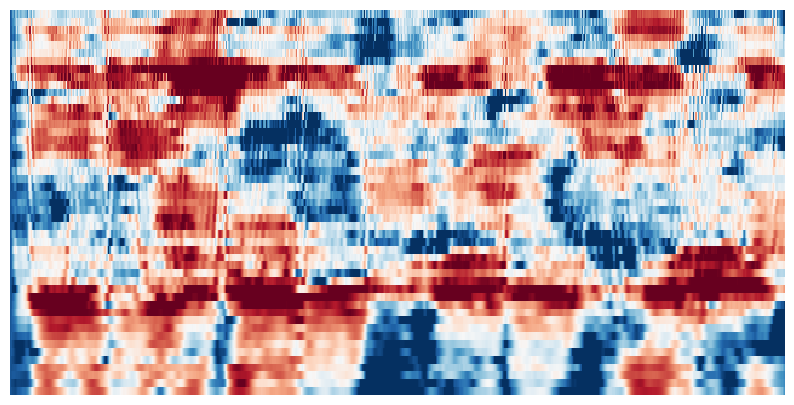

(640,) (49,) (49, 640)


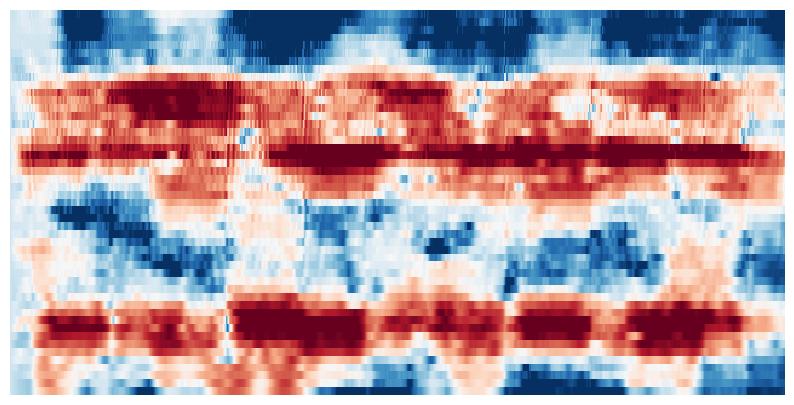

Applying baseline correction (mode: percent)
(640,) (49,) (49, 640)


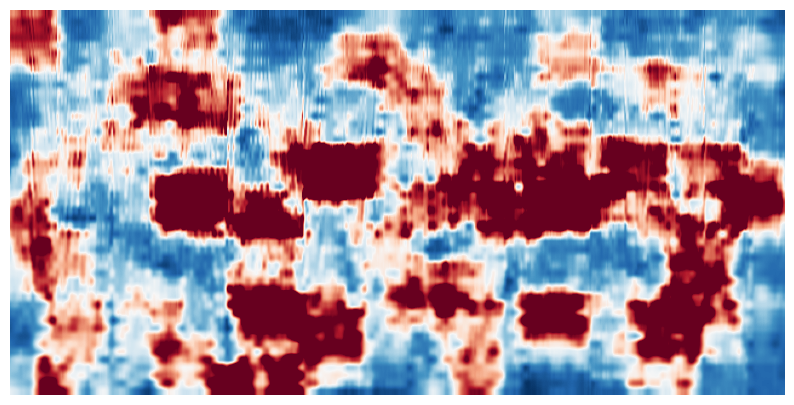

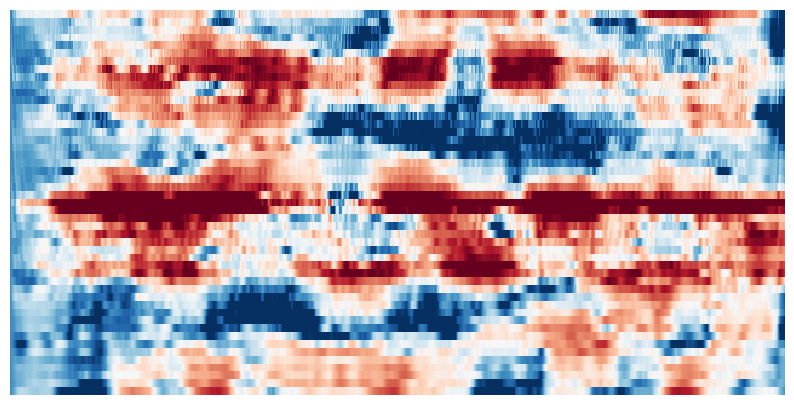

Applying baseline correction (mode: percent)


(640,) (49,) (49, 640)


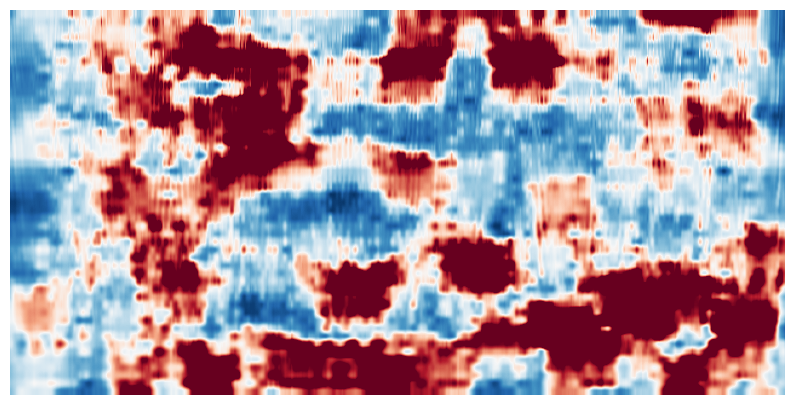

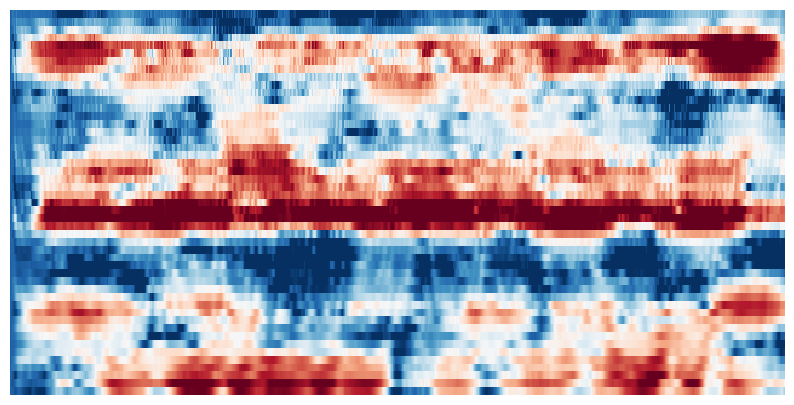

Applying baseline correction (mode: percent)


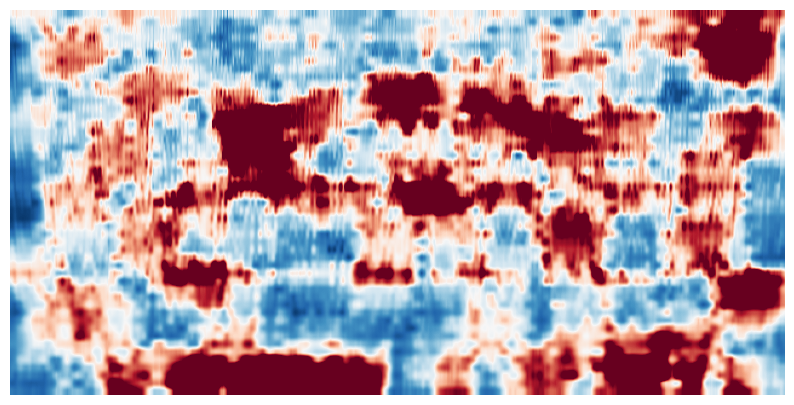

In [58]:
with open(pkl_files[0], 'rb') as file:
    events = pickle.load(file)
#for event in events:
power = events[0].compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks='O2')
#power = event.crop(tmin=1).compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks='O2')
path = "/home/castrogaray-j/Spectrogram_images/subject.png".format(1, 2, 3, 4)
plot_spectrogram(power, path)

event = events[0]
componets = ICA_components(event)

ch_names = componets.info['ch_names']  # Obtener nombres de canales
for ch in ch_names[0:3]:
    power = componets.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks=ch)
    path = "/home/castrogaray-j/Spectrogram_images/subject_{}_class_{}_label_{}_event_{}_channel_{}.png".format(2, 2, 3, 4, ch)
    plot_spectrogram(power, path)
    plot_erds(power, path)
    

In [ ]:
#%%capture --no-stderr --no-stdout cap
import numpy as np 
wind_length = 4
b_freq, u_freq = 1.0, 50.0

freqs = np.arange(b_freq, u_freq, 1)  # Frequency range
n_cycles = freqs / 2.  # Number of cycles per frequency


#epochs[0].compute_tfr(



with open(pkl_files[0], 'rb') as file:
        events = pickle.load(file)
    
sfreq = events[0].info['sfreq']
ch_names = events[0].info['ch_names']
total_iter= len(events)
progress_bar = tqdm(total=total_iter, desc="Progress", unit="iter")

for idx, event in enumerate(events[:5]):
    event.crop(tmin=1)
    #epoch = mne.make_fixed_length_epochs(event, duration=wind_length, preload=True, verbose='error')
    for ch in ch_names:
        power = event.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks=ch)
        path = "/home/castrogaray-j/Spectrogram_images/subject_{}_class_{}_event_{}_channel_{}.png".format(1, 2, idx, ch)
        plot_spectrogram(power, path)
        del power
        gc.collect()
        
        
    # del fig
    # gc.collect()
    progress_bar.update(1)

# Cerrar la barra de progreso al finalizar
progress_bar.close()


#
#plt.savefig('/home/castrogaray-j/Spectrogram_images/spectrogram.png', dpi=300)
#fig[0].savefig('/home/castrogaray-j/Spectrogram_images/spectrogram.png', dpi=100)

In [13]:
%reset -f

In [23]:
progress_bar.close()
# n -1 : 13.40s/iter
# n 10 : 12.59s/iter

In [ ]:
%%capture --no-stderr --no-stdout
wind_length = 4
b_freq, u_freq = 1.0, 50.0
sfreq = events[0].info['sfreq']
freqs = np.arange(b_freq, u_freq, 1)  # Frequency range
n_cycles = freqs / 2.  # Number of cycles per frequency

ch_names = epochs[0].info['ch_names']

total_iter= len(pkl_files)
progress_bar = tqdm(total=total_iter, desc="Progress", unit="iter")

with open('event_labels/performance_labels', 'rb') as file:
     labels_array = pickle.load(file)
    
for i, pkl in enumerate(pkl_files):
    labels_df = labels_array[i]
    with open(pkl, 'rb') as file:
        events = pickle.load(file)
    filtered_events = [item for i, item in enumerate(events[1:]) if i in labels_df.index]

    for idx, event in enumerate(events):
        event.crop(tmin=1)
        label = labels_df['label'].values[idx]
        #epoch = mne.make_fixed_length_epochs(event, duration=wind_length, preload=True, verbose='error')
        for ch in ch_names:
            power = event.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks=ch)
            path = "/data/castrogaray-j/Spectrogram_images/subject_{}_class_{}_label_{}_event_{}_channel_{}.png".format(int(pkl[8:10]), int(pkl[-5]), label, idx, ch)
            plot_spectrogram(power, path)
            del power
            gc.collect()
    
    # for idx, event in enumerate(filtered_events):
    #     copy_croped = event.copy().crop(tmin=1)
    #     epoch = mne.make_fixed_length_epochs(copy_croped, duration=wind_length, preload=True, verbose='error')
    #     label = labels_df['label'].values[idx]
    #     for ch in ch_names:
    #         power = epoch.compute_tfr(method="multitaper", freqs=freqs, n_cycles=n_cycles, picks=ch)
    #         fig = power.plot(baseline=(None, 0), mode='logratio', show=False, verbose='error', colorbar=False);
    #         for ax in fig[0].axes:
    #             ax.set_xticks([])  # Quitar ticks en eje X
    #             ax.set_yticks([])  # Quitar ticks en eje Y
    #             ax.set_xlabel("")  # Quitar etiqueta del eje X
    #             ax.set_ylabel("")  # Quitar etiqueta del eje Y
    #             ax.set_frame_on(False)  # Quitar borde del gráfico
    #         fig[0].savefig("/home/castrogaray-j/Spectrogram_images/subject_{}_class_{}_label_{}_event_{}_channel_{}.png".format(int(pkl[8:10]), int(pkl[-5]), label, idx, ch), dpi=100)
    #         fig.clear()
    
    #     del fig
    #     gc.collect()
        '''for j, event in enumerate(filtered_events):
            label = labels_df['label'].values[j]
            data = pd.DataFrame(event.get_data())
            data = data.transpose()
            data['class'] = int(pkl[-5])
            data['subject'] = int(pkl[8:10])
            data['label'] = label
            df_temp = pd.concat([df_temp, data], ignore_index=True)
            #print(' class: {}, subject: {}, label: {}'.format(int(pkl[-5]), int(pkl[8:10]), label))
    
        df = pd.concat([df, df_temp], ignore_index=True)'''
    progress_bar.update(1)

# Cerrar la barra de progreso al finalizar
progress_bar.close()


#
#plt.savefig('/home/castrogaray-j/Spectrogram_images/spectrogram.png', dpi=300)
#fig[0].savefig('/home/castrogaray-j/Spectrogram_images/spectrogram.png', dpi=100)

In [ ]:
total_iter= len(pkl_files)
progress_bar = tqdm(total=total_iter, desc="Progress", unit="iter")
df = pd.DataFrame()
with open('event_labels/performance_labels', 'rb') as file:
     labels_array = pickle.load(file)
    
for i, pkl in enumerate(pkl_files):
    labels_df = labels_array[i]

    with open(pkl, 'rb') as file:
        events = pickle.load(file)
    filtered_events = [item for i, item in enumerate(events[1:]) if i in labels_df.index]
    
    df_temp = pd.DataFrame()
    for j, event in enumerate(filtered_events):
        label = labels_df['label'].values[j]
        data = pd.DataFrame(event.get_data())
        data = data.transpose()
        data['class'] = int(pkl[-5])
        data['subject'] = int(pkl[8:10])
        data['label'] = label
        df_temp = pd.concat([df_temp, data], ignore_index=True)
        #print(' class: {}, subject: {}, label: {}'.format(int(pkl[-5]), int(pkl[8:10]), label))

    df = pd.concat([df, df_temp], ignore_index=True)
    progress_bar.update(1)

# Cerrar la barra de progreso al finalizar
progress_bar.close()

df



In [57]:
50*64*170

544000

In [22]:
from mne.time_frequency import tfr_morlet
power = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=False)
power

NOTE: tfr_morlet() is a legacy function. New code should use .compute_tfr(method="morlet").


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Data type,Average Power Estimates
Data source,Epochs
Number of epochs,64
Dims,"channel, freq, time"
Estimation method,morlet
Number of channels,64
Number of timepoints,5120
Number of frequency bins,49
Frequency range,1.00 – 49.00 Hz


In [ ]:
# Plot single-channel spectrogram
power.plot( baseline=(None, 0), mode='logratio', title='Morlet Wavelet Spectrogram')

In [ ]:
total_iter= len(pkl_files)
progress_bar = tqdm(total=total_iter, desc="Progress", unit="iter")
df = pd.DataFrame()

totalRows = 0 
for pkl in pkl_files:
    

    with open(pkl, 'rb') as file:
        events = pickle.load(file)
        for i in range( len( events ) ):
            totalRows+=len(events[i])

            if 5.0009765625 != len(events[i])/1024:
                print( len(events[i])/1024)
                print( pkl , i)

# with open('raw_sub-20_class_1.pkl', 'rb') as file:
#     events = pickle.load(file)

#for i in range( len( events ) ):
#print(len(events[-1])/1024 )
totalRows

In [38]:
(49156479/(5.0009765625*1024))

9599.0

In [39]:
total_iter= len(pkl_files)
progress_bar = tqdm(total=total_iter, desc="Progress", unit="iter")
df = pd.DataFrame()
for pkl in pkl_files:
    

    with open(pkl, 'rb') as file:
        events = pickle.load(file)
    df_temp = pd.DataFrame()
    for event in events:
        data = pd.DataFrame(event.get_data())
        data = data.transpose()
        data['class'] = int(pkl[-5])
        data['subject'] = int(pkl[8:10])
        df_temp = pd.concat([df_temp, data], ignore_index=True)

    df = pd.concat([df, df_temp], ignore_index=True)
    progress_bar.update(1)

# Cerrar la barra de progreso al finalizar
progress_bar.close()

df































































rogress: 100%|███████████████████████████████████████████████████████████████████████| 57/57 [14:32<00:00, 15.31s/iter]

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,class,subject
0,-1.694066e-21,1.164670e-21,5.082198e-21,2.117582e-21,5.929231e-21,-4.235165e-22,2.117582e-21,7.411538e-21,5.929231e-21,3.388132e-21,...,2.752857e-21,4.235165e-22,1.270549e-21,8.470329e-22,-8.470329e-22,-8.470329e-22,1.270549e-21,-3.388132e-21,1,1
1,-2.667676e-07,4.663738e-07,-9.873639e-08,4.070683e-07,7.193366e-07,-1.726920e-07,1.164984e-06,1.833160e-06,-1.375810e-07,6.006594e-07,...,6.699455e-07,8.307907e-07,2.057207e-06,1.366691e-06,9.598713e-07,2.824962e-07,8.708696e-07,9.834886e-08,1,1
2,-5.117413e-07,9.166347e-07,-1.513974e-07,8.374756e-07,1.432947e-06,-3.440157e-07,2.296349e-06,3.636361e-06,-2.011210e-07,1.210862e-06,...,1.336863e-06,1.646250e-06,4.046963e-06,2.699336e-06,1.871922e-06,5.591864e-07,1.747167e-06,1.895870e-07,1,1
3,-7.146754e-07,1.336196e-06,-1.179943e-07,1.311546e-06,2.134137e-06,-5.121444e-07,3.362059e-06,5.380100e-06,-1.230970e-07,1.838368e-06,...,1.996809e-06,2.431605e-06,5.906240e-06,3.965018e-06,2.692056e-06,8.242168e-07,2.631829e-06,2.669365e-07,1,1
4,-8.594422e-07,1.713059e-06,3.017395e-08,1.844112e-06,2.814930e-06,-6.738802e-07,4.333417e-06,7.036312e-06,1.521477e-07,2.488366e-06,...,2.644093e-06,3.172290e-06,7.580012e-06,5.133712e-06,3.382960e-06,1.071344e-06,3.523968e-06,3.242323e-07,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49156474,-9.409061e-06,-3.141499e-06,-8.379883e-06,-5.933396e-06,-1.459741e-06,-2.178826e-06,-3.939842e-06,-3.359693e-06,-1.645382e-06,-3.918532e-06,...,-2.533642e-07,-6.198654e-06,-4.374413e-06,-3.310236e-06,-4.477206e-07,9.129486e-07,1.500918e-06,4.291450e-06,3,21
49156475,-7.393714e-06,-2.586678e-06,-6.632058e-06,-4.628604e-06,-1.136006e-06,-1.726994e-06,-3.211942e-06,-2.710958e-06,-1.310361e-06,-3.075795e-06,...,-2.779414e-07,-4.826026e-06,-3.390944e-06,-2.459670e-06,-2.911065e-07,7.111857e-07,1.058107e-06,3.180547e-06,3,21
49156476,-5.098529e-06,-1.840644e-06,-4.594245e-06,-3.174853e-06,-7.788930e-07,-1.198123e-06,-2.269999e-06,-1.902006e-06,-9.110509e-07,-2.118172e-06,...,-2.294897e-07,-3.305557e-06,-2.316180e-06,-1.627789e-06,-1.728027e-07,4.863884e-07,6.706145e-07,2.100165e-06,3,21
49156477,-2.601830e-06,-9.564161e-07,-2.350518e-06,-1.614942e-06,-3.962490e-07,-6.136069e-07,-1.174845e-06,-9.801187e-07,-4.669436e-07,-1.079815e-06,...,-1.284013e-07,-1.680103e-06,-1.175384e-06,-8.100845e-07,-8.007825e-08,2.468069e-07,3.243128e-07,1.043574e-06,3,21


In [40]:
#df.to_csv('/home/castrogaray-j/U_Winnipeg_OneDrive/Pattern recognition/BICT/raw/raw.csv', index = False)
with open('/home/castrogaray-j/U_Winnipeg_OneDrive/Pattern recognition/BICT/raw/raw_subjects_2.pkl', 'wb') as file:
    pickle.dump(df, file)